# CS146 Assignment 4
**Armin Hamp**

*21 November 2019*

In [1]:
#import necessary libraries
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

In [2]:
#define medical trial data control group
success=[9,11,4,21,12,0] 
total=[15,18,10,39,29,10]
#combine for: [success, failure]
data=[success,[total[i]-success[i] for i in range(len(total))]]

## Non-hierarchical Model

The structure of the non-hierarchical model followed:

Likelihood: $\prod_{i=1}^6 \text{Binomial}(s_i\,|\,\theta, n_i)$, where $s_i$ is the number of successful recoveries, $f_i$ is the number of failures (did not recover), and $n_i=s_i+f_i$ the number of patients.

Prior: $\text{Beta}(\theta\,|\,1,1)$ for both $\theta_t$ and $\theta_c$.

Posterior for control group: $\text{Beta}(\theta_c\,|\,58, 65)$.

We can use this model to generate fake data (posterior predictive samples) by:

1. Sampling the posterior for probabilities of success: $\theta_{posterior}$ .
2. Sampling a $Binomial(s|\theta_{posterior},n)$, where $s$ is the number of successful recoveries and $n$ is the number of patients, which I set equal to the mean of the total studies, $n=20$.

In [3]:
#generate theta posterior
posterior=sts.beta(58,65) #posterior

#sample posterior 100000 times 
theta_samples=posterior.rvs(size=100000)

In [4]:
#function to generate binomial sample with given theta value
def generate_data(theta):
    n=20 #number of patients
    successes=list(sts.binom.rvs(n,p=theta,size=6))
    failures=[n-successes[i] for i in range(6)]
    return [successes,failures]

#generate data for each theta
fake_data=[generate_data(i) for i in theta_samples] 

## Test Statistic

To assess the quality of the generated data, we want to devise a test statistic that captures the most characteristic features of the original data. We can calculate a test statistic value for all of our generated data and compare it to the statistic calculated for our data that was given.

Since our original studies showed a wide range of success rates (e.g. 0/10 or 11/18) I wanted to see whether this wide range is true of our generated data too. I chose to calculate the range of success rates for each data sample.

In [5]:
def test_statistic(data):
    #calculate range of success rate for data sample
    proportions=[data[0][i]/(data[0][i]+data[1][i]) for i in range(len(data[0]))]
    result=max(proportions)-min(proportions)
    return result

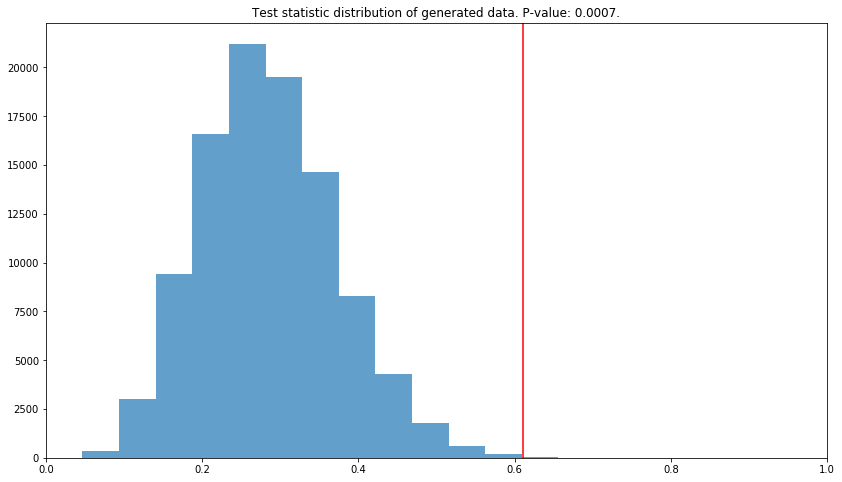

In [6]:
#plot a histogram of test statistics for generated data
hist_data=[test_statistic(i) for i in fake_data]
plt.figure(figsize=(14,8))
reference=test_statistic(data)
plt.xlim(0,1) 
plt.axvline(reference,color='red') #test stat of original data
plt.hist(hist_data,bins=16,alpha=0.7)


#p value
count=0
for i in hist_data:
    if i>reference:
        count+=1
plt.title("Test statistic distribution of generated data. P-value: %.4f." % 
          (count/len(hist_data)))
plt.show()

As can be seen in the graph above our posterior predictive samples from the non-hierarchical model do not capture our original data very well. Most of the test statistics of the generated data fall below the statistic calculated for the original dataset, with a $p<0.05$.

## HC Applications
**#sampling:** In this assignment I accurately apply and explain the posterior predictive sampling of our non-hierarchical model. Consequently, I evaluate the effectiveness of our generated data using a test statistic.
